## Part 1 : SVD

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

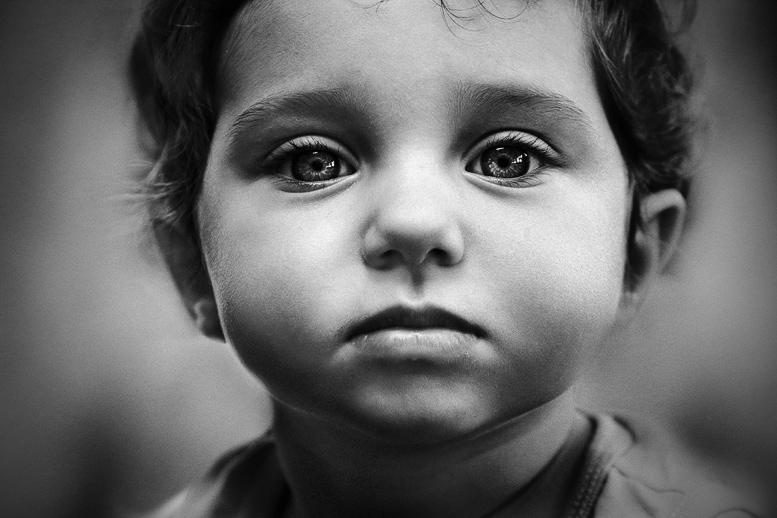

In [314]:
im = Image.open('3.png').convert("L")
im

### step1: converting the picture to the $518 * 777$ matrix $A$

In [315]:
a = im.getdata()
a = np.array(a)
A = a.reshape(518,777)
A = A.T

### step2: calculating the $A^tA$ matrix and it's eignvalues and eignvectors and the singular values of $A$

In [316]:
AtA = np.dot(A.T, A)
la, V = np.linalg.eig(AtA)
S = np.sqrt(la)
S = S.reshape(518)

#### eignvalues values of $A^tA$ :

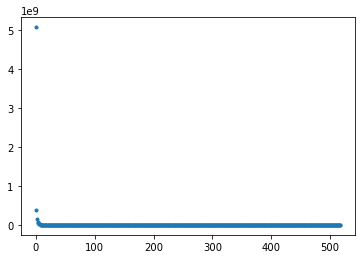

In [312]:
plt.plot(la,'.')

#### singular values of $A$ :

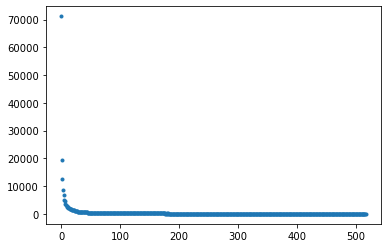

In [269]:
plt.plot(S,'.')

* we can see that less than 20 singular values are greater than 1

### Step 3: calculating $u_i$ (the orphonormal base of matrix A)

In [270]:
U = np.dot(A, V) * (1/S)

### Step 4: recunstructing the picture from $U, \Sigma , V$  

In [271]:
A2 = np.dot(np.dot(U, np.diag(S)), V.T)
A2 = A2.T

### final reslut :

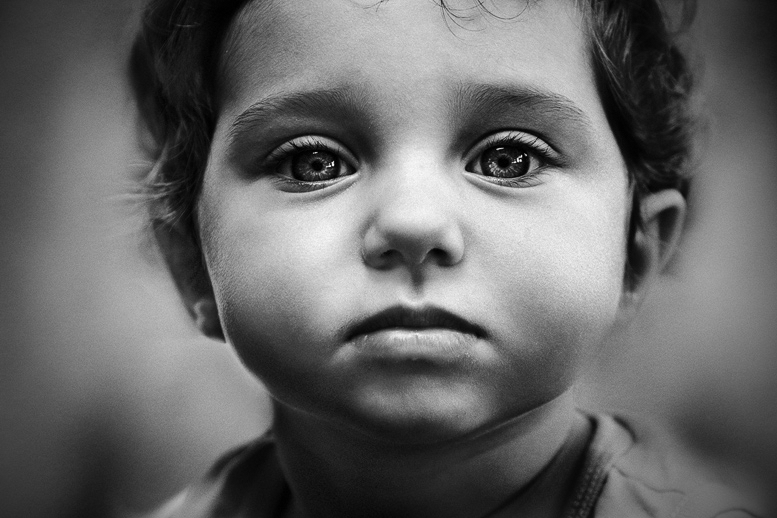

In [272]:
c = np.uint8(A2)
Image.fromarray(c)

In [273]:
def reconstruct(i):
    A2 = np.dot(np.dot(U[:,:i], np.diag(S[:i])), V.T[:i])
    A2 = A2.T
    A2 = [[max(min(A2[i][j], 255),0) for j in range(777)]for i in range(518)]
    c = np.uint8(A2)
    return Image.fromarray(c)

### reconstructing the picture with 10 singular values

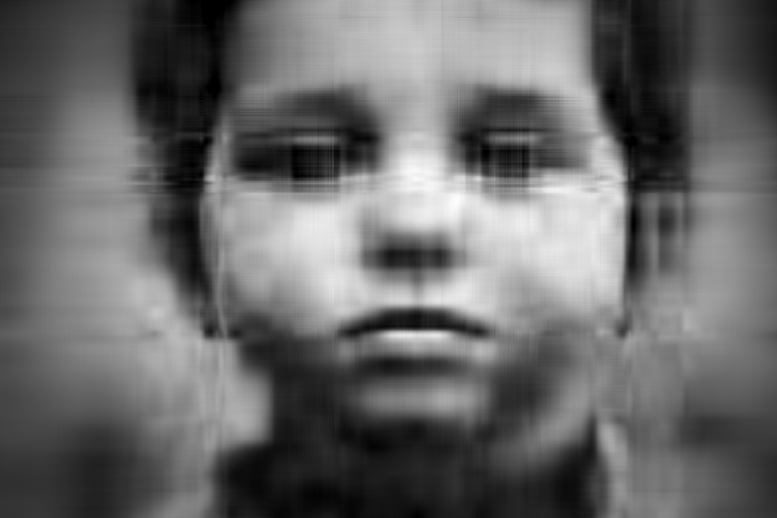

In [274]:
reconstruct(10)

### reconstructing the picture with 50 singular values

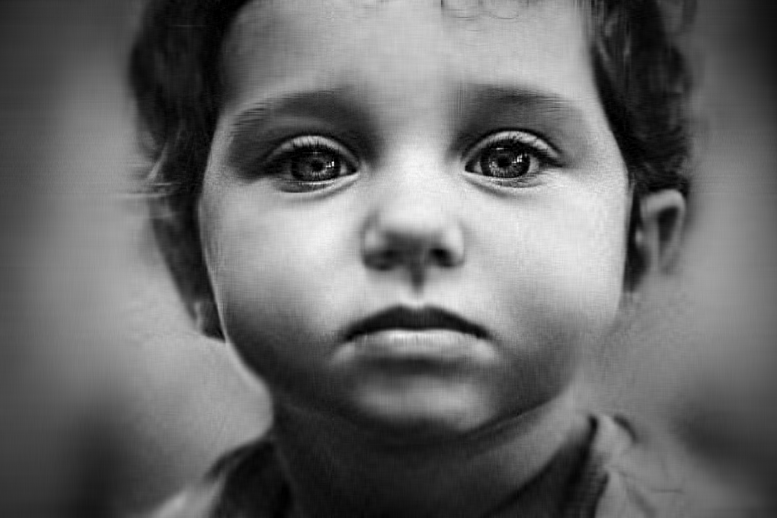

In [275]:
reconstruct(50)

### reconstructing the picture with 100 singular values

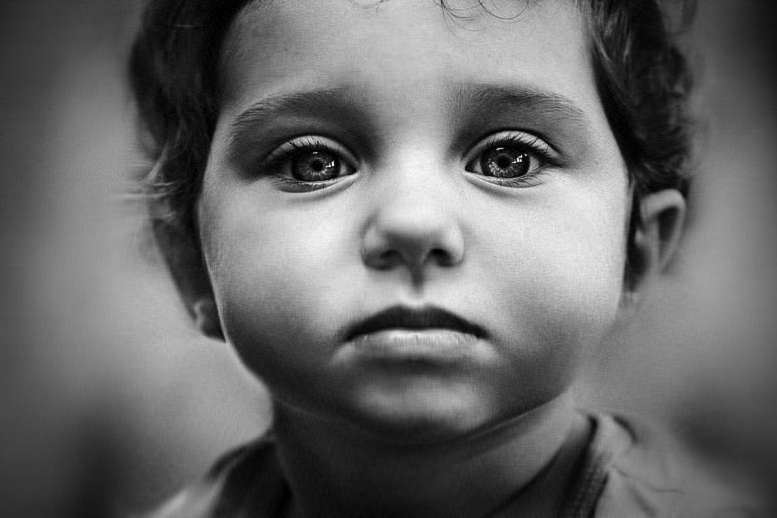

In [276]:
reconstruct(100)

### reconstructing the picture with 150 singular values

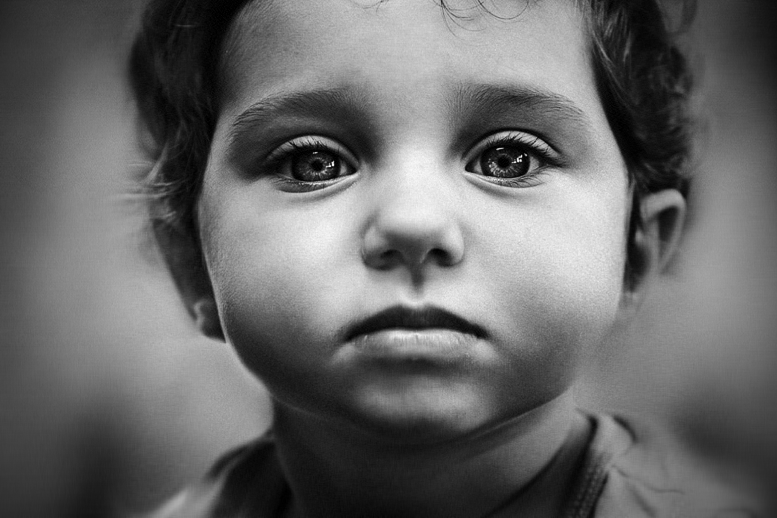

In [277]:
reconstruct(150)

### reconstructing the picture with 200 singular values

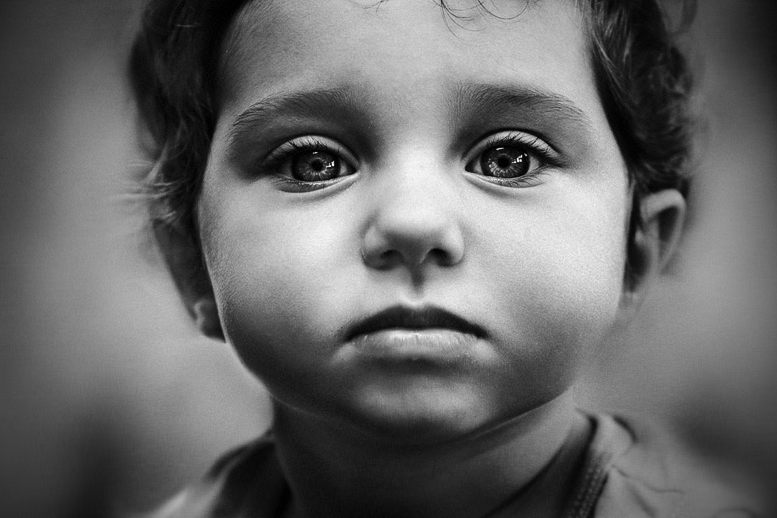

In [278]:
reconstruct(200)

## conclusion:
we can see that by using just 100 singular values, can construct the original picture that the ordinary eye can not distinguish between them. and the total values we must keep for it is $(m+n+1)P = (777+518+1)100 = 129600$ that is about 0.32 percent of all data in image

# Part 2: PCA

### step 1: removing average from each culomn of matrix

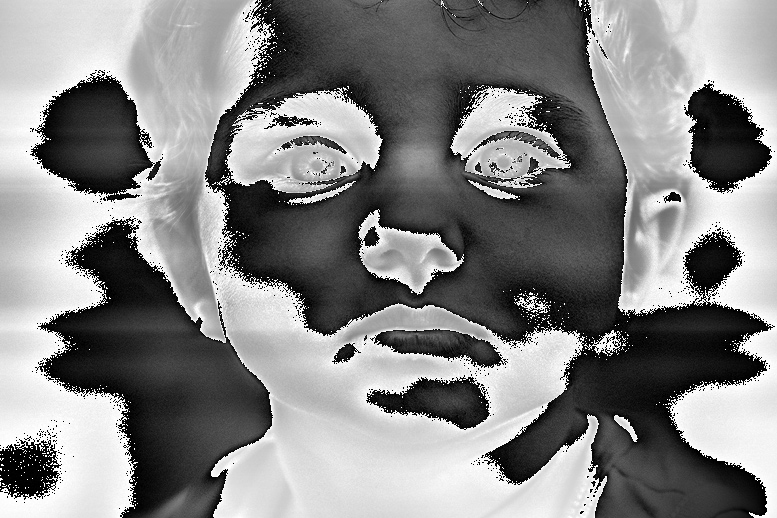

In [279]:
avg = [np.average(A.T[i]) for i in range(len(A[0]))]
Xt = np.array([A.T[i] - avg[i] for i in range(len(A[0]))])
c = np.uint8(Xt)
Image.fromarray(c)

### step 2: calculating covariance matrix

In [280]:
C = (1/777) * np.dot(Xt, Xt.T)

### step 3: digonalizing the covariance matrix

In [281]:
S, P = np.linalg.eig(C)

### step 4: change the skope of matrix $X$ using matrix $P$

In [282]:
y = np.dot(Xt.T, P)

### final result: reconstructing the image

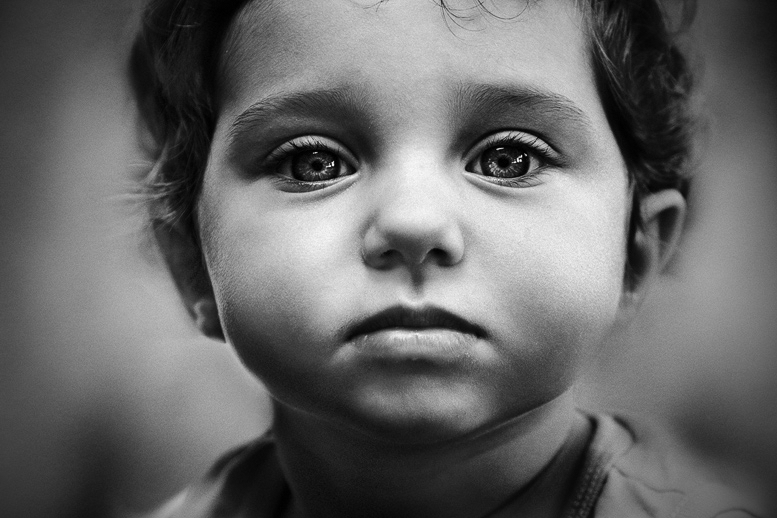

In [283]:
x2 = np.dot(y, P.T)
x2t = np.array([x2[:,i] + avg[i] for i in range(len(avg))])
c = np.uint8(x2t)
Image.fromarray(c)

In [287]:
def pca(i):
    y  = np.dot(Xt.T, P[:,:i])
    x2 = np.dot(y, P[:,:i].T)
    x2t = np.array([x2[:,i] + avg[i] for i in range(len(avg))])
    x2t = [[max(min(x2t[i][j], 255),0) for j in range(777)]for i in range(518)]
    c = np.uint8(x2t)
    return c

### reconstructin the image using 10 principle values 

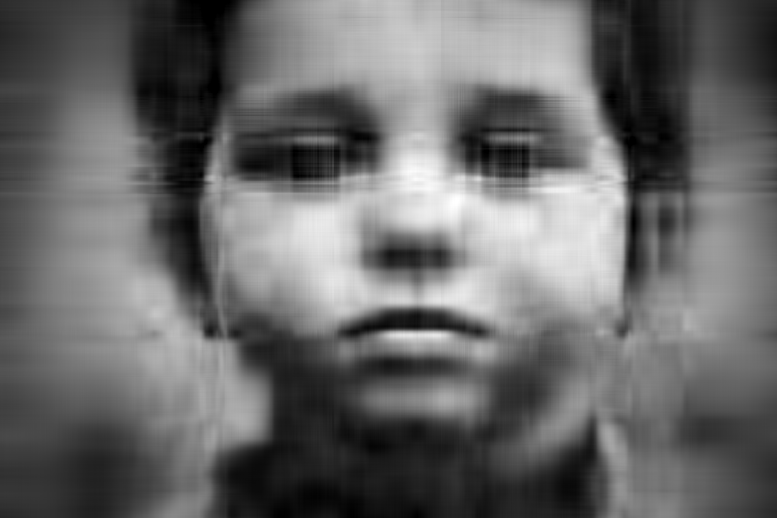

In [288]:
Image.fromarray(pca(10))

### reconstructin the image using 50 principle values 

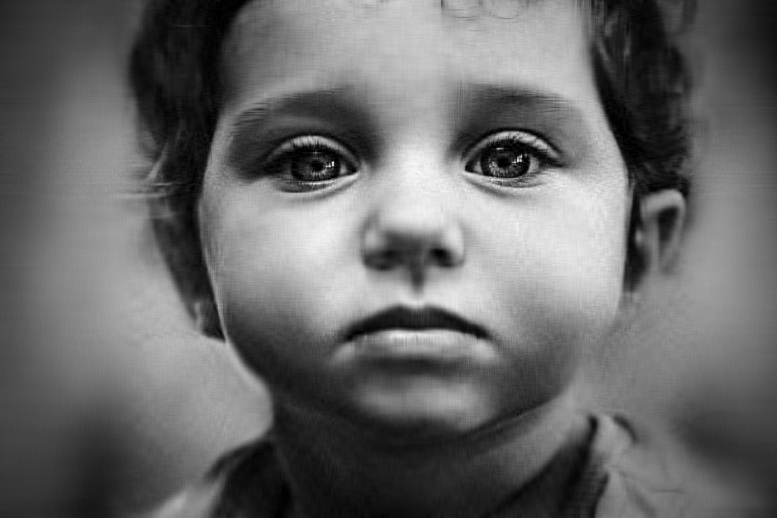

In [289]:
Image.fromarray(pca(50))

### reconstructin the image using 100 principle values 

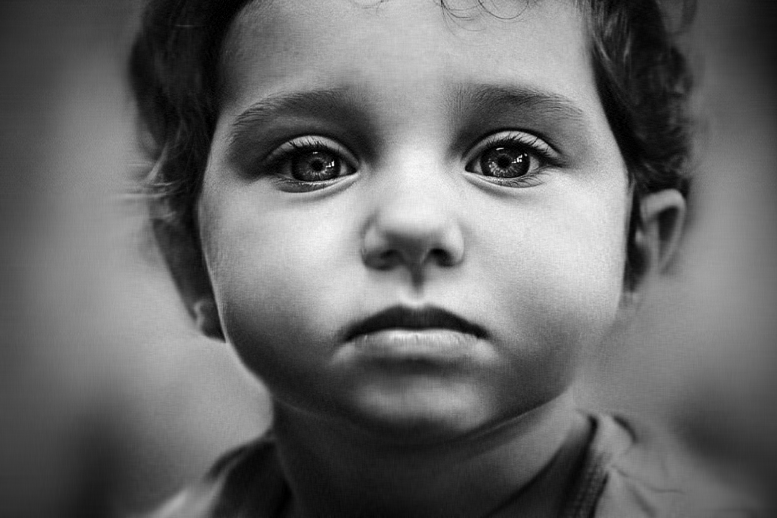

In [291]:
Image.fromarray(pca(100))

### reconstructin the image using 150 principle values 

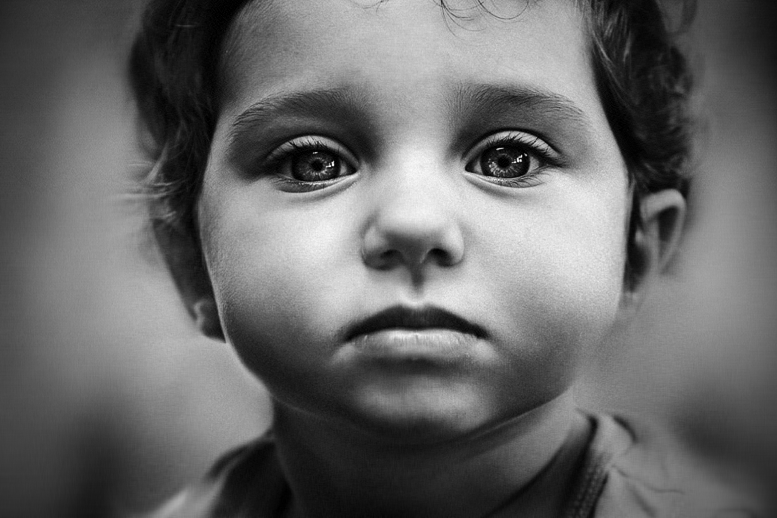

In [292]:
Image.fromarray(pca(150))

### reconstructin the image using 200 principle values 

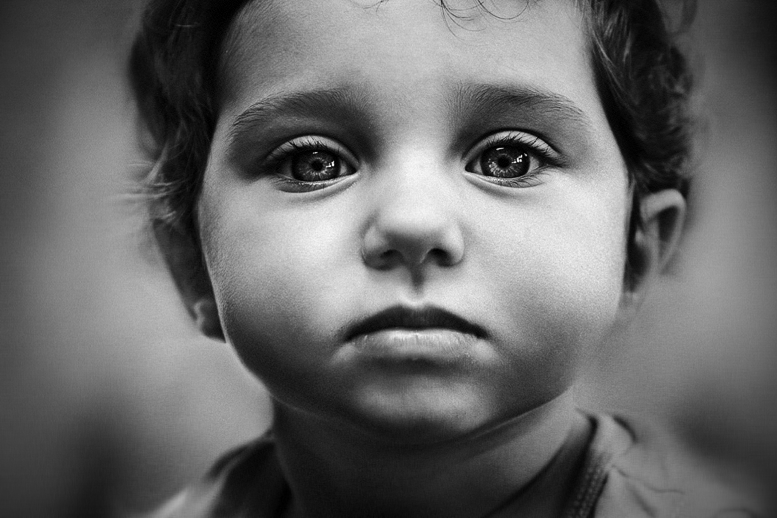

In [293]:
Image.fromarray(pca(200))

## conclusion:
we can see that by using just 100 principle values, can construct the original picture that the ordinary eye can not distinguish between them. and the total values we must keep for this decomposition is $m.k + n.k = 777.100 + 518.100 = 129500$ that is about 0.32 percent of all data in image.

## scikit learn:


In [297]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import scipy.io as sio
import matplotlib.image as image
import pandas as pd
import matplotlib.pyplot as plt

In [298]:
 print(A.shape)

(777, 518)


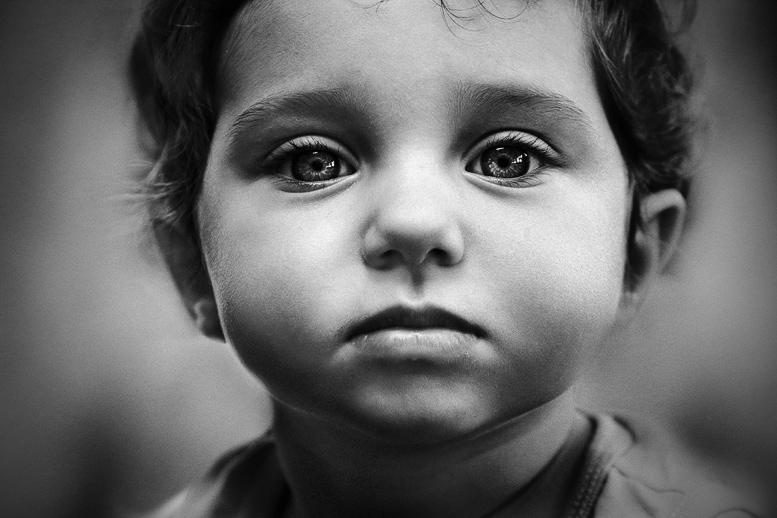

In [299]:
c = np.uint8(A.T)
Image.fromarray(c)

In [320]:
ipca = PCA(200).fit(A)
img_c = ipca.transform(A)

In [321]:
print(img_c.shape)
print(np.sum(ipca.explained_variance_ratio_))

(777, 200)
0.997886182980156


(777, 518)


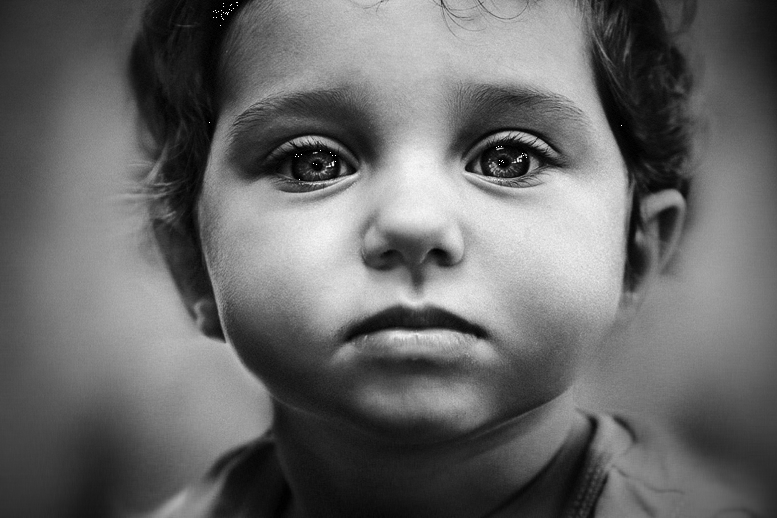

In [322]:
temp = ipca.inverse_transform(img_c)
print(temp.shape)

c = np.uint8(temp.T)
Image.fromarray(c)


In [323]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    return err

## accuracy

In [324]:
mse(c , A.T )

14.292939381742471

In [328]:
mse(pca(200) ,A.T)

5.823929279527735

In [329]:
from sklearn.metrics import accuracy_score


In [330]:
At = A.reshape(777*518)
ct = c.reshape(777*518)
accuracy_score(ct , At)

0.004497050829097161

In [331]:
At = A.reshape(777*518)
ct = pca(200).reshape(777*518)
accuracy_score(ct , At)

0.004710722857441004